In [1]:
PATH_TO_IMAGES_FOLDER='images'
IMAGE_PATHS = 'test_images/'
PATH_TO_ANNOTATIONS_FOLDER='annotations'
PATH_TO_MODEL='My_Faster_RCNN_Resnet101_1024x1024_Aug_Birds'
PATH_EXPORT_MODEL = 'exported-models/My_Faster_RCNN_Resnet101_1024x1024_Aug_Birds'
PATH_TO_MODEL_DIR ='exported-models/My_Faster_RCNN_Resnet101_1024x1024_Aug_Birds'
PATH_TO_LABELS = './annotations/label_map.pbtxt'

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)


# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load('exported-models/My_Faster_RCNN_Resnet101_1024x1024_Aug_Birds/saved_model/')

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 7.016414165496826 seconds


In [4]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for test_images/TM 3.jpg... Done
Running inference for test_images/ER 2.jpg... Done
Running inference for test_images/TM 4.jpg... Done
Running inference for test_images/PP 2.jpg... Done
Running inference for test_images/TM 1.jpg... Done
Running inference for test_images/PA 5.jpg... Done
Running inference for test_images/PA 3.jpg... Done
Running inference for test_images/PP 3.jpg... Done
Running inference for test_images/PA 2.jpg... Done
Running inference for test_images/PP 4.jpg... Done
Running inference for test_images/TM 2.jpg... Done
Running inference for test_images/ER 5.jpg... Done
Running inference for test_images/PP 1.jpg... Done
Running inference for test_images/PP 5.jpg... Done
Running inference for test_images/TM 5.jpg... Done
Running inference for test_images/PA 1.jpg... Done
Running inference for test_images/ER 1.jpg... Done
Running inference for test_images/ER 4.jpg... Done
Running inference for test_images/ER 3.jpg... Done
Running inference for test_imag

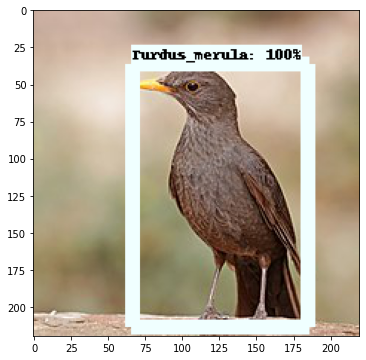

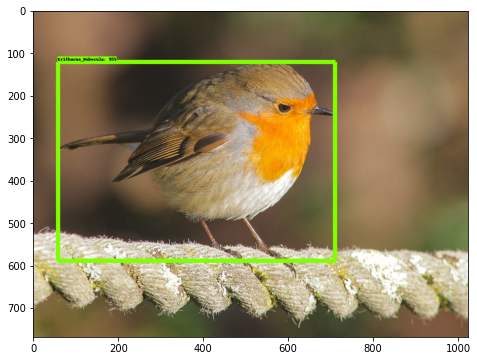

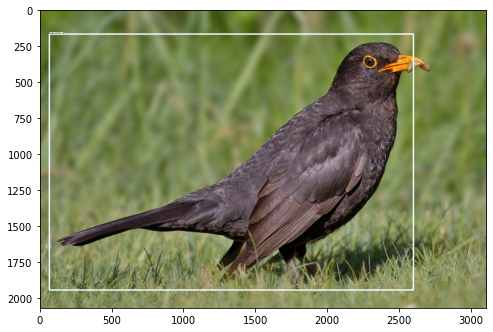

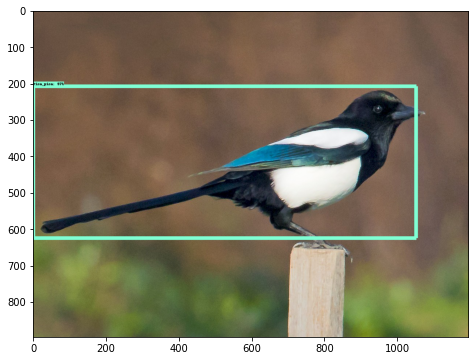

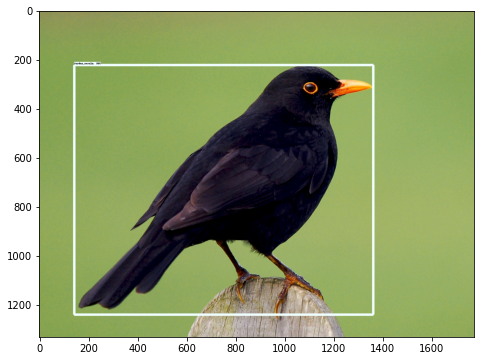

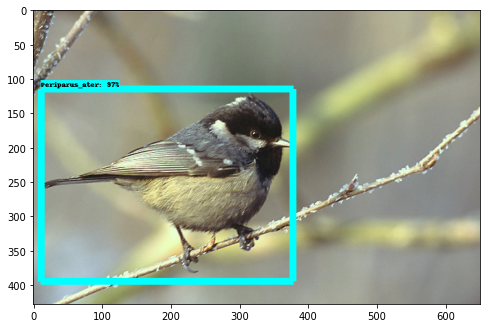

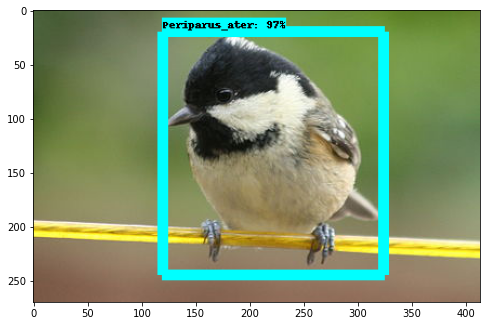

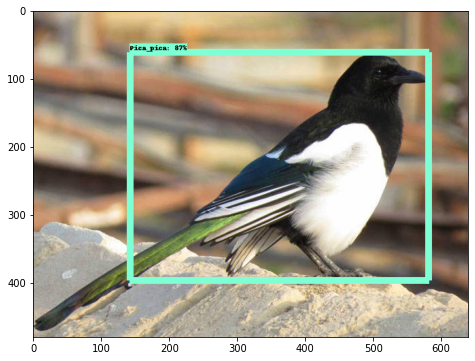

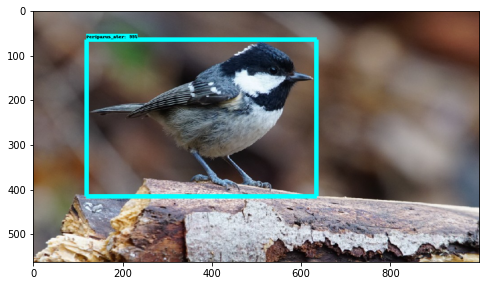

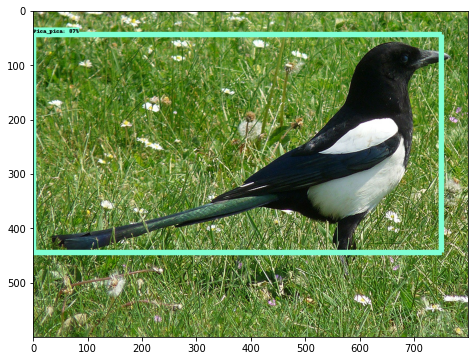

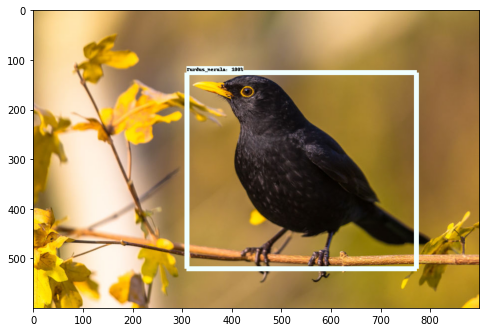

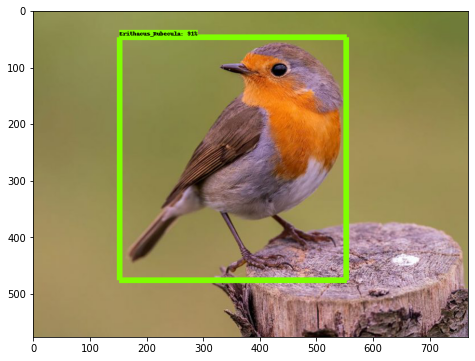

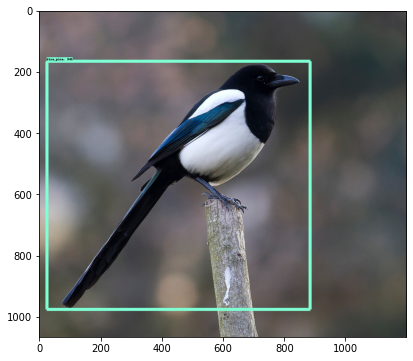

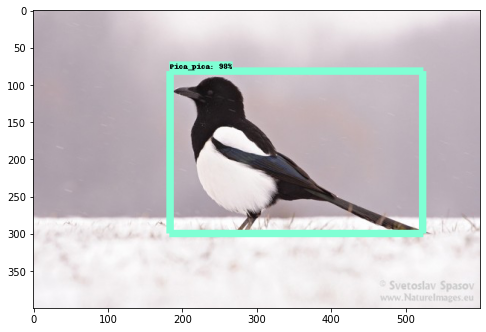

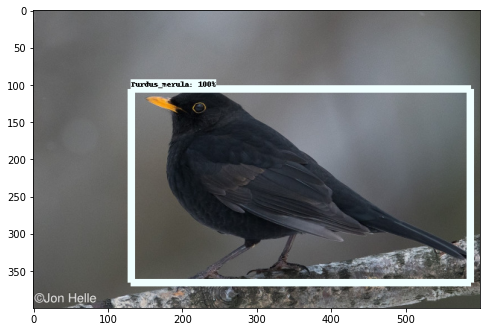

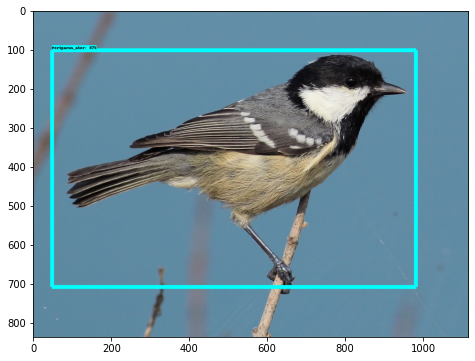

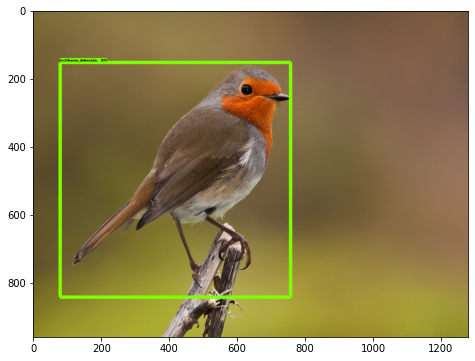

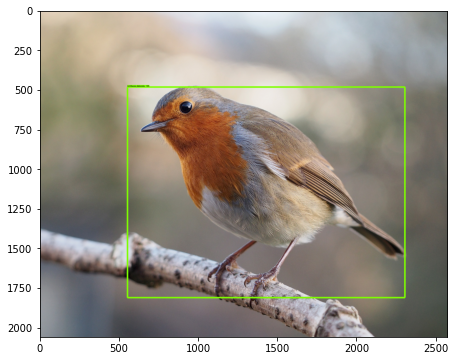

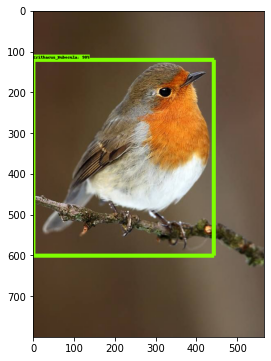

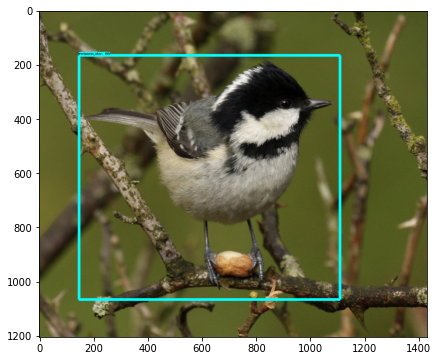

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

# convert the image into numpy array
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


# loop through the test image directory and peform detection on each image
for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)


    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.75,
          line_thickness=10,
          agnostic_mode=False)

    plt.figure(figsize=(8, 6))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

In [6]:
!export CUDA_VISIBLE_DEVICES=-1

In [7]:
!python model_main_tf2.py --pipeline_config_path=models/{PATH_TO_MODEL}/pipeline.config --model_dir=models/{PATH_TO_MODEL} --checkpoint_dir=models/{PATH_TO_MODEL} --alsologtostderr

W1218 02:40:57.648370 140490940371776 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1218 02:40:57.648459 140490940371776 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1218 02:40:57.648500 140490940371776 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1218 02:40:57.648538 140490940371776 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1218 02:40:57.648589 140490940371776 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:Reading unweighted datasets: ['annotations/test.record']
I1218 02:40:58.083276 140490940371776 dataset_builder.py:163] Reading unweighted datasets: ['annotations/test.record']
INFO:tensor

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
W1218 02:41:19.489824 140490940371776 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py:464: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is 

INFO:tensorflow:Waiting for new checkpoint at models/My_Faster_RCNN_Resnet101_1024x1024_Aug_Birds
I1218 02:46:01.988087 140490940371776 checkpoint_utils.py:140] Waiting for new checkpoint at models/My_Faster_RCNN_Resnet101_1024x1024_Aug_Birds
^C
Traceback (most recent call last):
  File "model_main_tf2.py", line 113, in <module>
    tf.compat.v1.app.run()
  File "/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "model_main_tf2.py", line 80, in main
    model_lib_v2.eval_continuously(
  File "/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8